<a href="https://colab.research.google.com/github/CarlosMendez1997Col/GeoDatabases-And-Cloud-Computing-For-Water-Resources-Management/blob/main/1-Creation%20Geodatabase/Download_and_Geoprocessing_Databases_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and Geoprocessing Databases in Google Colab

---

> Water Resources Management using PostgreSQL and PgAdmin4

> Area of Interest (South America)

> Developed by MSc Carlos Mendez

MOST TABLES AND DATASETS USED:

1. South America Countries and Boundary
2. First Level Administrative Units (FLAU)
3. Second Level Administrative Units (SLAU)
4. HydroSHEDS (Conditioned DEM)
5. HydroBASINS (Level 1,2,3,4,5,6,7,8,9,10,11 and 12)
6. HydroRIVERS
7. HydroLAKES
8. Global Lakes and Wetlands Database (GLWD)
9. HydroWASTE
10. Global River Classification (GloRiC)
11. Lake TEMP
12. Global Power Plant Database (GPPD)



## Install and import ArcGIS API for Python

In [2]:
# If you need to install any library, please delete commit and then install it
#!pip install arcgis
#!pip install geopandas

## Import libraries and packages

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import zipfile
import os
import time
from datetime import datetime as dt

In [4]:
import arcgis
from arcgis.features import FeatureLayer, FeatureLayerCollection
from arcgis.geometry import SpatialReference

from google.colab import output
output.enable_custom_widget_manager()

# connect to GIS
from arcgis.gis import GIS

## Connect and Login in Arcgis Account

In [7]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ")
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: Camendezv_UDFJC
Enter your password: ··········


## Import and extract Databases in your local computer

1. South America Countries and Boundary [Url Data](https://international.ipums.org/international/resources/gis/IPUMSI_world_release2024.zip)

2. First Level Administrative Units (FLAU) [Url Data](https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip)

3. Second Level Administrative Units (SLAU) [Url Data](https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.zip)

4. HydroSHEDS (Digital Elevation Model) [Url Data](https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_sa_dem_30s.zip)

5. HydroBASINS (Level 1 to 12) [Url Data](https://data.hydrosheds.org/file/hydrobasins/standard/hybas_sa_lev01-12_v1c.zip)

6. HydroRIVERS [Url Data](https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_sa_shp.zip)

7. HydroLAKES [Url Data](https://data.hydrosheds.org/file/hydrolakes/HydroLAKES_polys_v10_shp.zip)

8. Global Lakes and Wetlands Database (GLWD) [Url Data](https://figshare.com/ndownloader/files/54001748)

9. HydroWASTE [Url Data](https://figshare.com/ndownloader/files/31910714)

10. Global River Classification (GloRiC) [Url Data](https://data.hydrosheds.org/file/hydrosheds-associated/gloric/GloRiC_v10_shapefile.zip)

11. Lake TEMP [Url Data](https://figshare.com/ndownloader/files/46397785)

12. Global Power Plant Database (GPPD) [Url Data](https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip)

### Connect to Google Drive

In [8]:
import os
os.makedirs('/content', exist_ok=True) # Create the parent directory if it doesn't exist

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Set Directory or WorkSpace
%cd /content/drive/MyDrive/Geodatabase

/content/drive/MyDrive/Geodatabase


### 1. South America Countries and Boundary (SACB)

In [10]:
!wget https://international.ipums.org/international/resources/gis/IPUMSI_world_release2024.zip

--2025-09-09 03:59:27--  https://international.ipums.org/international/resources/gis/IPUMSI_world_release2024.zip
Resolving international.ipums.org (international.ipums.org)... 128.101.163.176
Connecting to international.ipums.org (international.ipums.org)|128.101.163.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61705330 (59M) [application/zip]
Saving to: ‘IPUMSI_world_release2024.zip’

IPUMSI_world_releas 100%[===================>]  58.85M  21.1MB/s    in 2.8s    

2025-09-09 03:59:30 (21.1 MB/s) - ‘IPUMSI_world_release2024.zip’ saved [61705330/61705330]



In [11]:
!unzip "/content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.zip" -d "/content/drive/MyDrive/Geodatabase"

Archive:  /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.zip
 extracting: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.CPG  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.dbf  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.prj  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.sbn  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.sbx  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.shp  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.shp.xml  
  inflating: /content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.shx  


In [16]:
 ## Delete Zip to reduce space and volume
 !rm '/content/drive/MyDrive/Geodatabase/IPUMSI_world_release2024.zip'

In [12]:
SACB = gpd.read_file('IPUMSI_world_release2024.shp')
SACB.head()

OBJECTID                    CNTRY_NAME CNTRY_CODE  BPL_CODE  \
0         1                       Algeria        012   13010.0   
1         2                        Angola        024   12010.0   
2         3  In dispute South Sudan/Sudan       9999   99999.0   
3         4                         Benin        204   15010.0   
4         5                      Botswana        072   14010.0   

                                            geometry  
0  MULTIPOLYGON (((-2.05592 35.0737, -2.05675 35....  
1  MULTIPOLYGON (((12.7976 -4.41685, 12.79875 -4....  
2  POLYGON ((28.08408 9.34722, 28.03889 9.34722, ...  
3  MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299...  
4  POLYGON ((25.16312 -17.77816, 25.16383 -17.778...

In [13]:
SACB.drop(['CNTRY_CODE','BPL_CODE'], axis=1, inplace=True)
SACB.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    285 non-null    int64   
 1   CNTRY_NAME  285 non-null    object  
 2   geometry    285 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.8+ KB


In [14]:
SA_countries =  ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'French Guiana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
SACB_SA = SACB[SACB['CNTRY_NAME'].isin(SA_countries)]
SACB_SA.head(14)

OBJECTID     CNTRY_NAME  \
188       190       Colombia   
265       267      Argentina   
266       268        Bolivia   
267       269         Brazil   
268       270          Chile   
269       271        Ecuador   
270       272  French Guiana   
272       274         Guyana   
273       275       Suriname   
275       277       Paraguay   
276       278           Peru   
281       283        Uruguay   
282       284      Venezuela   

                                              geometry  
188  MULTIPOLYGON (((-78.9072 1.51383, -78.90828 1....  
265  MULTIPOLYGON (((-66.54253 -55.05753, -66.54669...  
266  POLYGON ((-65.36821 -9.70672, -65.3546 -9.7236...  
267  MULTIPOLYGON (((-52.06714 -32.04836, -52.06919...  
268  MULTIPOLYGON (((-68.69253 -56.52419, -68.69508...  
269  MULTIPOLYGON (((-80.20506 -3.43708, -80.20842 ...  
270  MULTIPOLYGON (((-51.65583 4.07008, -51.65772 4...  
272  MULTIPOLYGON (((-57.51797 6.266, -57.52092 6.2...  
273  POLYGON ((-54.01639 5.62806, -54.00783 5.62853...  
275  POLYGON ((-58.17077 -19.83313, -58.17132 -19.8...  
276  MULTIPOLYGON (((-70.82428 -18.03555, -70.82511...  
281  MULTIPOLYGON (((-54.97583 -34.95042, -54.97336...  
282  MULTIPOLYGON (((-60.85136 8.60661, -60.85506 8...

<Axes: >

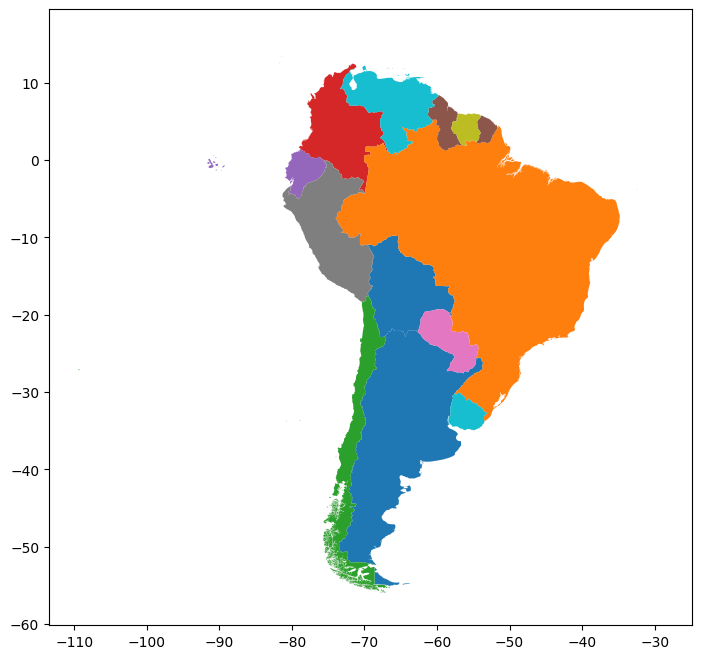

In [15]:
SACB_SA.plot(column='CNTRY_NAME', figsize=(16,8))

### 2. First Level Administrative Units (FLAU)

In [ ]:
!wget https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip

--2025-09-09 03:37:46--  https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/wmgeolab/geoBoundaries/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip [following]
--2025-09-09 03:37:46--  https://media.githubusercontent.com/media/wmgeolab/geoBoundaries/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM1.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103470246 (99M) [application/zip]
Saving to: ‘geoBoundariesCGAZ_ADM1.zip’

geoBoundariesCGAZ_A 100%[===================>]  98.68M  39.6MB/s    in 2

### 3. Second Level Administrative Units (SLAU)

### 4. HydroSHEDS (Digital Elevation Model)

### 5. HydroBASINS (Level 1 to 12)

### 6. HydroRIVERS

### 7. HydroLAKES

### 8. Global Lakes and Wetlands Database (GLWD)

### 9. HydroWASTE

### 10. Global River Classification (GloRiC)

### 11. LakeTEMP

### 12. Global Power Plant Database (GPPD)

geoBoundariesCGAZ_ADM0.zip


In [ ]:
!rm -r /content/

In [ ]:







https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM2.zip


https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_sa_dem_30s.zip


https://data.hydrosheds.org/file/hydrobasins/standard/hybas_sa_lev01-12_v1c.zip


https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_sa_shp.zip


https://data.hydrosheds.org/file/hydrolakes/HydroLAKES_polys_v10_shp.zip


https://figshare.com/ndownloader/files/54001748


https://figshare.com/ndownloader/files/31910714


https://data.hydrosheds.org/file/hydrosheds-associated/gloric/GloRiC_v10_shapefile.zip


https://figshare.com/ndownloader/files/46397785


https://datasets.wri.org/private-admin/dataset/53623dfd-3df6-4f15-a091-67457cdb571f/resource/66bcdacc-3d0e-46ad-9271-a5a76b1853d2/download/globalpowerplantdatabasev130.zip


!wget your_external_url_to_zip_file.zip